### The OLIVETTI Dataset

https://scikit-learn.org/0.19/datasets/olivetti_faces.html

There are 10 different images of 40 distinct subjects.

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Olivetti dataset
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target


In [2]:
X.shape

(400, 4096)

In [3]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

There are 10 distinct images of 40 distinct people , so 40 samples and each sample has 4096 features(64 x 64 pixeled image)

In [4]:
X[0]

array([0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
       0.1570248 ], shape=(4096,), dtype=float32)

all the features are between 0 and 1.

In [5]:
import numpy as np
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

array([<Axes: title={'center': 'Face id: 0'}>,
       <Axes: title={'center': 'Face id: 0'}>,
       <Axes: title={'center': 'Face id: 1'}>,
       <Axes: title={'center': 'Face id: 2'}>,
       <Axes: title={'center': 'Face id: 3'}>,
       <Axes: title={'center': 'Face id: 4'}>,
       <Axes: title={'center': 'Face id: 4'}>,
       <Axes: title={'center': 'Face id: 5'}>,
       <Axes: title={'center': 'Face id: 6'}>,
       <Axes: title={'center': 'Face id: 7'}>,
       <Axes: title={'center': 'Face id: 8'}>,
       <Axes: title={'center': 'Face id: 8'}>,
       <Axes: title={'center': 'Face id: 9'}>,
       <Axes: title={'center': 'Face id: 10'}>,
       <Axes: title={'center': 'Face id: 11'}>,
       <Axes: title={'center': 'Face id: 12'}>,
       <Axes: title={'center': 'Face id: 12'}>,
       <Axes: title={'center': 'Face id: 13'}>,
       <Axes: title={'center': 'Face id: 14'}>,
       <Axes: title={'center': 'Face id: 15'}>,
       <Axes: title={'center': 'Face id: 16'}>,
     

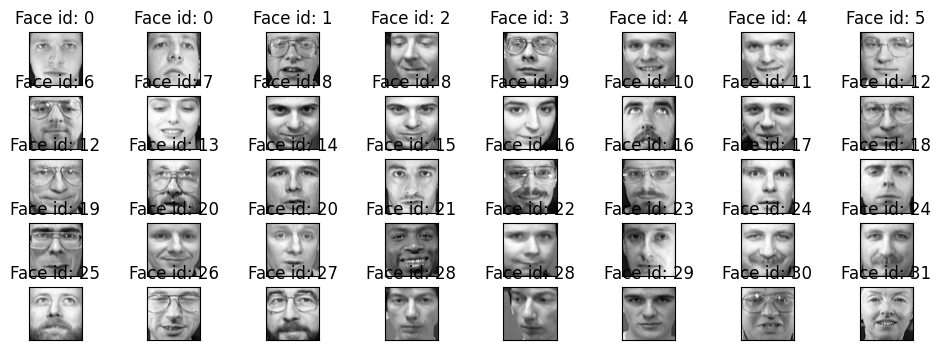

In [11]:
fig, subplots = plt.subplots(5, 8, figsize=(12, 4))
subplots = subplots.flatten()

for i in np.unique(y):
    image_index = i*8
    subplots[i].imshow(X[image_index].reshape(64, 64), cmap='gray')
    subplots[i].set_xticks([]) # Remove x-ticks
    subplots[i].set_yticks([]) # Remove y-ticks
    subplots[i].set_title(f'Face id: {y[image_index]}')
    
subplots

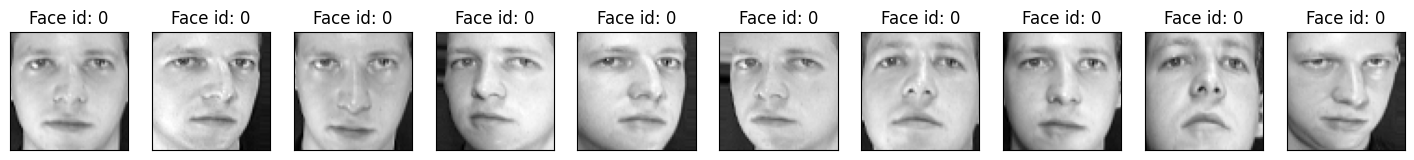

In [12]:
fig, subplots = plt.subplots(1, 10, figsize=(18,9))
for i in range(10):
    subplots[i].imshow(X[i].reshape(64, 64), cmap='gray')
    subplots[i].set_xticks([]) # Remove x-ticks
    subplots[i].set_yticks([]) # Remove y-ticks
    subplots[i].set_title(f'Face id: {y[i]}')
plt.show()

### Finding the optimal number of principal components

In [13]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)


In [14]:
### PCA to find the optimal number of principal components
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


What is PCA Doing?

PCA transforms your data into new axes (components) so that:

The first component captures the most variance (i.e., information) in the data.

The second captures the next most (orthogonal to the first), and so on.

Each subsequent component captures less variance.

The eigen vectors has as many components as the number of features in the dataset, which is 4096 (64x64 pixels).

In [15]:
# Step 2: Extract explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

Cumulative Explained Variance: This tells you how much total information (variance) is retained if you keep the first k components.

In [17]:
cumulative_variance

array([0.23812738, 0.37806702, 0.45775312, 0.50773644, 0.54383487,
       0.5754042 , 0.59967256, 0.62003654, 0.6396177 , 0.65633893,
       0.67229116, 0.68666095, 0.6991283 , 0.71059966, 0.7212284 ,
       0.7310056 , 0.7401962 , 0.74835193, 0.75589067, 0.7633605 ,
       0.7703463 , 0.7764926 , 0.7823319 , 0.78802913, 0.79349107,
       0.79880965, 0.8039478 , 0.8089062 , 0.8134828 , 0.81789464,
       0.8219147 , 0.82575655, 0.82937604, 0.8327215 , 0.8359253 ,
       0.8390857 , 0.84213716, 0.8451235 , 0.8479449 , 0.850685  ,
       0.85328275, 0.8558227 , 0.85826814, 0.8606665 , 0.8629754 ,
       0.8652396 , 0.86746246, 0.8696669 , 0.8717561 , 0.8738059 ,
       0.8757743 , 0.8776887 , 0.8795392 , 0.8813286 , 0.8831047 ,
       0.8848295 , 0.8865154 , 0.88815707, 0.88977593, 0.89135987,
       0.8929142 , 0.8944365 , 0.8959361 , 0.8974132 , 0.8988393 ,
       0.90024525, 0.90161467, 0.9029544 , 0.90426356, 0.9055508 ,
       0.90682507, 0.9080874 , 0.90932536, 0.9105387 , 0.91171

Text(0.5, 1.0, 'Cumulative Variance Explained by Principal Components')

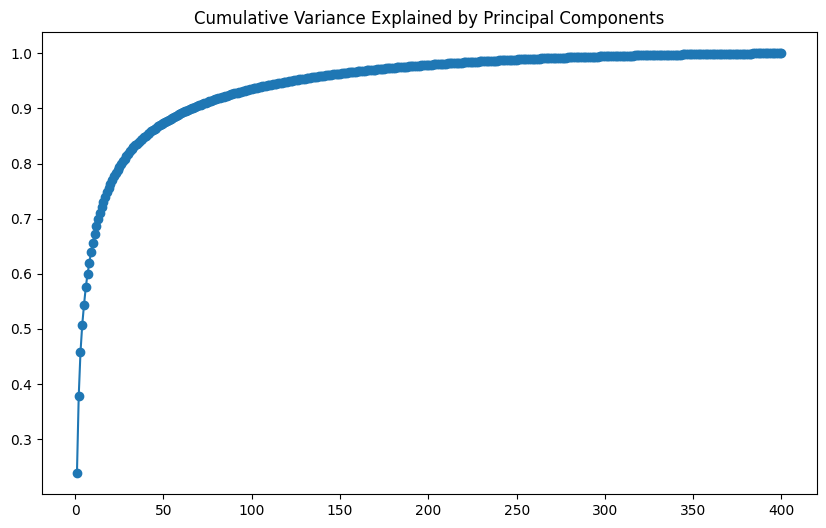

In [18]:
#plot number of components vs cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')

In [19]:
import numpy as np

# Find the number of components to explain at least 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")


Optimal number of components to retain 95% variance: 123


### Ml Model retraining 123 components from 4096 features

In [20]:
# Perform PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=optimal_components)
Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

In [22]:
Xtrain_pca.shape, Xtest_pca.shape

((300, 123), (100, 123))

In [23]:
##constructing the eigenfaces
eigenfaces = pca.components_.reshape((optimal_components, 64, 64)) #eigen vectors reshaped to images
#The eigen vectors has as many components as the number of features in the dataset, which is 4096 (64x64 pixels).
number_of_eigenfaces = eigenfaces.shape[0]


In [24]:
number_of_eigenfaces

123

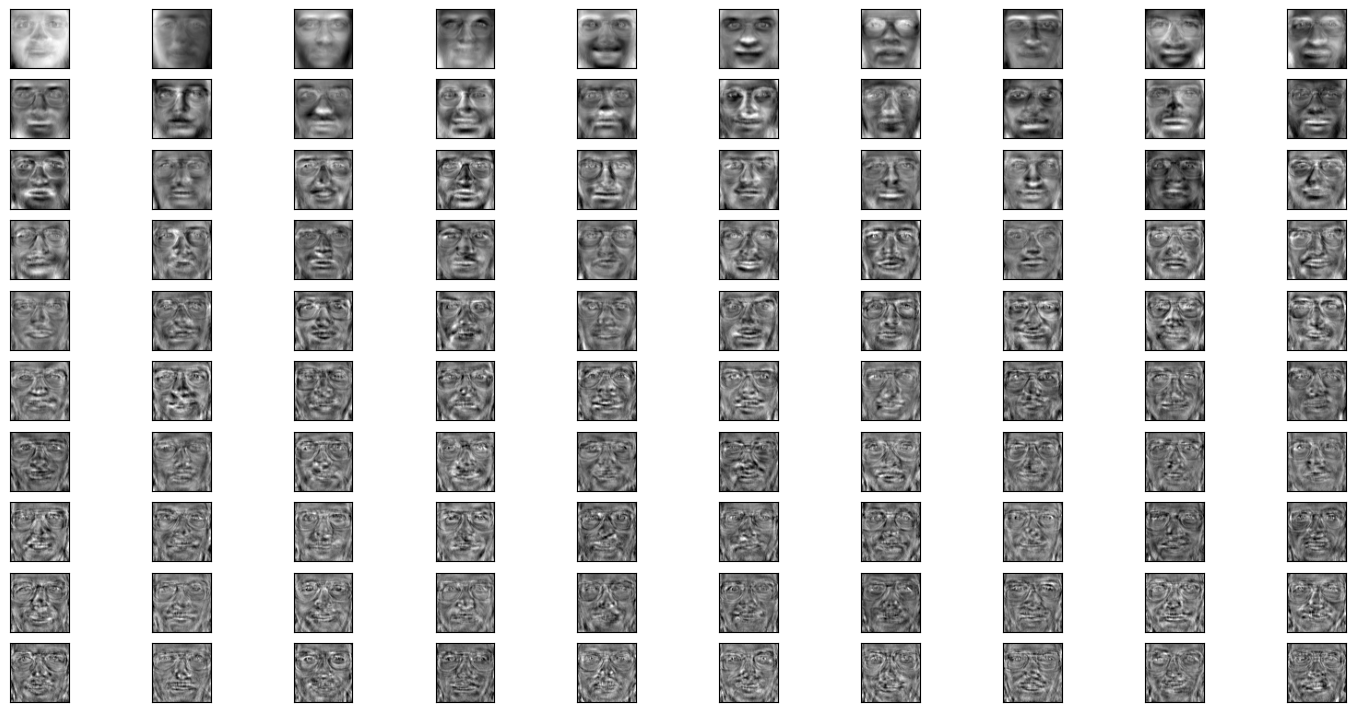

In [27]:
fig, subplots = plt.subplots(10, 10, figsize=(18, 9))
subplots = subplots.flatten()
for i in range(100):
    subplots[i].imshow(eigenfaces[i], cmap='gray')
    subplots[i].set_xticks([]) # Remove x-ticks
    subplots[i].set_yticks([]) # Remove y-ticks
    #subplots[i].set_title(f'Eigenface {i+1}')
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
models=[('Logistic Regression', LogisticRegression()),
        ('SVM', SVC()),('Naive Bayes', GaussianNB())]
for name, model in models:
    classifier_model = model
    classifier_model.fit(Xtrain_pca, ytrain)
    ypred = classifier_model.predict(Xtest_pca)
    accuracy = accuracy_score(ytest, ypred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.95
SVM Accuracy: 0.92
Naive Bayes Accuracy: 0.81


c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


In [29]:
from sklearn.model_selection import cross_val_score
Xall=pca.fit_transform(X)  # Transform the entire dataset
for name, model in models:
    classifier_model = model
    scores = cross_val_score(classifier_model, Xall, y, cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Logistic Regression Cross-Validation Accuracy: 0.97 ± 0.02
SVM Cross-Validation Accuracy: 0.94 ± 0.03
Naive Bayes Cross-Validation Accuracy: 0.81 ± 0.05


c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) f